In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_1_path = './data/amazon_cells_labelled.txt'
dataset_2_path = './data/imdb_labelled.txt'
dataset_3_path = './data/yelp_labelled.txt'

In [22]:
def run_model(keywords): 
    data_raw = pd.read_csv(dataset_1_path, delimiter="\t", header=None)
    data_raw.columns = ['text', 'sentiment']
    
    for key in keywords:
        data_raw[key] = (data_raw.text.str.contains(key, case=False)).astype(int)
    
    sns.heatmap(data_raw.corr())
    
    data = data_raw[keywords]
    target = data_raw["sentiment"]

    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB() #initiate the model
    bnb.fit(data, target) # fit the model

    #classify
    y_pred = bnb.predict(data)
    data_raw["prediction"] = y_pred
    
    run_model.debug = data_raw[data_raw["prediction"] != data_raw["sentiment"]]

    #results
    print("Out of {} records we mislabeled: {}".format( data.shape[0], (target != y_pred).sum() ))


Out of 1000 records we mislabeled: 295


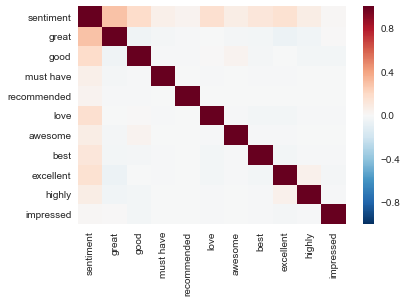

In [23]:
original_model = ["great", "good", "must have", "recommended", "love", "awesome", "best", "excellent", "highly", \
                  "impressed"]
run_model(original_model)

Out of 1000 records we mislabeled: 272


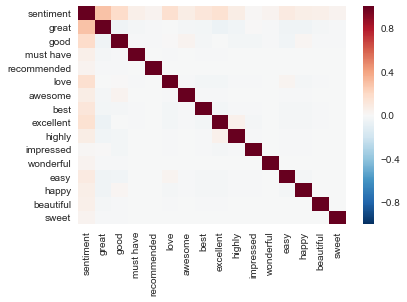

In [32]:
# Go back and iterate by engineering new features, removing poor features, or tuning parameters
model_1 = ["great", "good", "must have", "recommended", "love", "awesome", "best", "excellent", "highly", \
           "impressed", "wonderful", "easy", \
           "happy", "beautiful", "sweet"]
run_model(model_1)

Out of 1000 records we mislabeled: 261


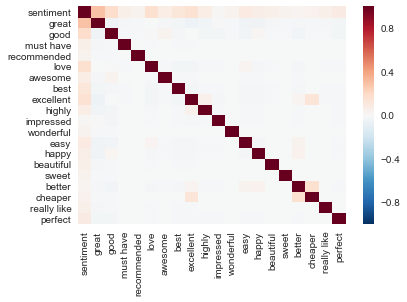

In [33]:
model_2 = ["great", "good", "must have", "recommended", "love", "awesome", "best", \
           "excellent", "highly", "impressed", "wonderful", "easy", "happy", "beautiful", "sweet", \
           "better", "cheaper", "really like", "perfect"]
run_model(model_2)

Out of 1000 records we mislabeled: 246


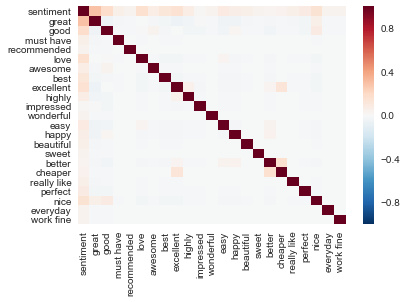

In [36]:
model_3 = ["great", "good", "must have", "recommended", "love", "awesome", "best", \
           "excellent", "highly", "impressed", "wonderful", "easy", "happy", "beautiful", "sweet", \
           "better", "cheaper", "really like", "perfect", "nice", "everyday", "work fine"]
run_model(model_3)

Out of 1000 records we mislabeled: 243


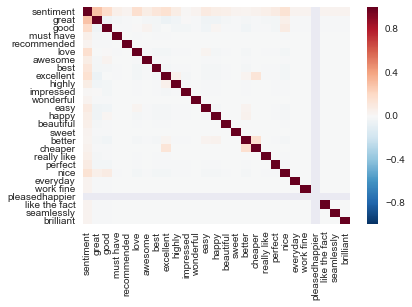

In [44]:
run_model.debug["text"]
model_4 = ["great", "good", "must have", "recommended", "love", "awesome", "best", \
           "excellent", "highly", "impressed", "wonderful", "easy", "happy", "beautiful", "sweet", \
           "better", "cheaper", "really like", "perfect", "nice", "everyday", "work fine", "pleased" \
            "happier", "like the fact", "seamlessly", "brilliant"]
run_model(model_4)

# We're starting to see big diminishing returns here :(